In [64]:
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import seaborn as sns 
import mysql.connector
import numpy as np

In [65]:
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import seaborn as sns 
import mysql.connector
import numpy as np

In [66]:
db = mysql.connector.connect(
    host = "localhost" , 
    username = "root" , 
    password = "1234" , 
    database = "ecom" , 
    auth_plugin='mysql_native_password'
)
cur = db.cursor()

In [67]:
query = """select distinct customer_city from ecom.customers""" 

cur.execute(query)
data = cur.fetchall()


# list all unique cities where customers are located

In [68]:
query = """select distinct customer_city from ecom.customers""" 

cur.execute(query)
data = cur.fetchall()

# Count the number of orders placed in 2017

In [69]:
query = """select count(order_id) from ecom.orders where 
year(order_purchase_timestamp) = 2017""" 

cur.execute(query)
data = cur.fetchall()
print("total orders placed in 2017 are" , data[0][0])

total orders placed in 2017 are 90202


# find total sales per category

In [8]:
query = """select Upper(products.product_category)  category, round(sum(payments.payment_value), 2 ) sales from 
products join order_item on products.product_id = order_item.product_id join payments
on payments.order_id = order_item.order_id group by category"""
cur.execute(query)
data = cur.fetchall()
data
df  = pd.DataFrame(data, columns = ["Category" , "Sales"])
print(df.head(10))

               Category       Sales
0             PERFUMERY   506738.66
1  FURNITURE DECORATION  1430176.39
2             TELEPHONY   486882.05
3        BED TABLE BATH  1712553.67
4            AUTOMOTIVE   852294.33
5  COMPUTER ACCESSORIES  1585330.45
6            HOUSEWARES  1094758.13
7                BABIES   539845.66
8                  TOYS   619037.69
9      FURNITURE OFFICE   646826.49


# calculate the % of order that were paid in installments.

In [9]:

query = """select (sum(case when payment_installments > 1 then 1 else 0 end)/count(*))*100 as percentage from payments"""
cur.execute(query)
data = cur.fetchall()

"the Percentage of orders that were paid in installments is" ,data[0][0]

('the Percentage of orders that were paid in installments is',
 Decimal('49.4176'))

# Count the number of customers from each state

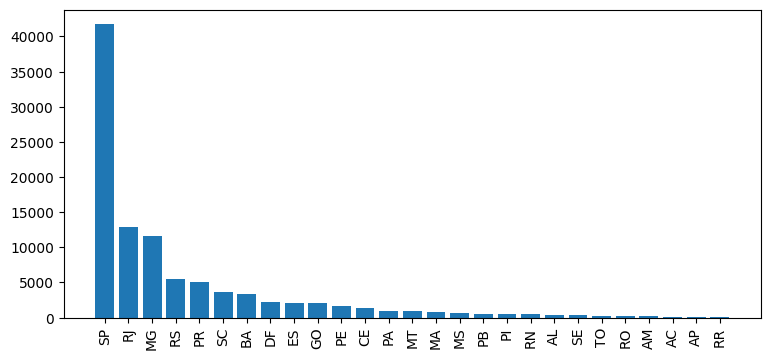

In [10]:

query = """SELECT customer_state , count(customer_id) as population FROM ecom.customers group by customer_state"""
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns = ["state" , "Population"])
df = df.sort_values(by = "Population" , ascending = False)
plt.figure(figsize = (9,4))
plt.bar(df["state"],df["Population"])
plt.xticks(rotation = 90)

plt.show()



# Calculate the number of order per month in 2018

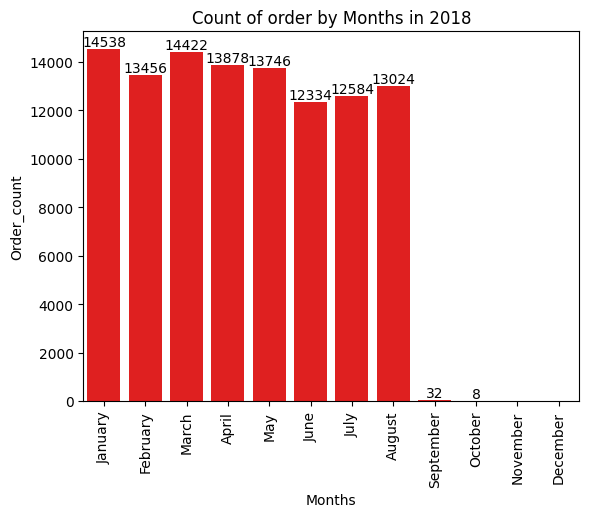

In [11]:
query = """select monthname(order_purchase_timestamp) , count(order_id)  from orders where year(order_purchase_timestamp) = 2018 group by monthname(order_purchase_timestamp)"""
cur.execute(query)
data = cur.fetchall()
o = ["January" ,"February", "March", "April", "May" , "June" , "July" , "August" , "September" , "October" , "November" , "December" ] 
df = pd.DataFrame(data, columns = ["Months" , "Order_count"])

ax = sns.barplot(x = df["Months"], y = df["Order_count"] , data = df , order = o  , color = "red" )
plt.title("Count of order by Months in 2018")
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)
plt.show()

# fin the average number of products per order , grouper by customer city

In [12]:
query = """with count_per_order as 
(select orders.order_id , orders.customer_id , count(order_item.order_id)
as oc from orders join order_item
on orders.order_id = order_item.order_id
group by orders.order_id , orders.customer_id)

select customers.customer_city , round(avg(count_per_order.oc),
2) average_orders from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city"""
cur.execute(query)
data = cur.fetchall()


In [17]:
df = pd.DataFrame(data , columns =  ["Customer City" , "Avg Order"])

In [18]:
df

,Customer City,Avg Order
0,treze tilias,2.55
1,indaial,2.23
2,sao jose dos campos,2.28
3,sao paulo,2.31
4,porto alegre,2.35
...,...,...
4105,japaratuba,2.00
4106,sebastiao leal,2.00
4107,buriti,6.00
4108,morro agudo de goias,2.00


# calculate  the percentage of total revenue contributed by each product category

In [113]:
query = """ select upper(products.product_category) category , (round(sum(payments.payment_value))/(select sum(payments.payment_value)  from payments))*100  from products join 
order_item on products.product_id = order_item.product_id 
join payments
on payments.order_id = order_item.order_id
group by category """
cur.execute(query)
data = cur.fetchall()


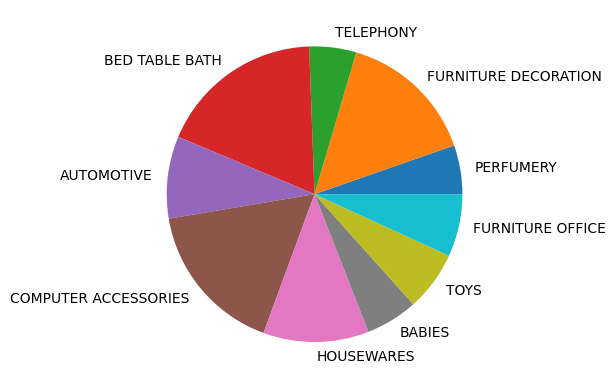

In [119]:
df = pd.DataFrame(data , columns = ["Product Category" , "Percentage of Total Revenue"])
df = df.head(10)
plt.pie(df["Percentage of Total Revenue"] , labels = df["Product Category"])
plt.show()

# identify the correlation between product price and the number of times a product has been purchased/

In [104]:
query = """ select products.product_category, 
count(order_item.product_id), 
round(avg(order_item.price) ,2 )
from products join order_item on products.product_id = order_item.product_id
group by products.product_category """
cur.execute(query)
data = cur.fetchall()
data

[('HEALTH BEAUTY', 9670, 130.16),
 ('sport leisure', 8641, 114.34),
 ('Cool Stuff', 3796, 167.36),
 ('computer accessories', 7827, 116.51),
 ('Watches present', 5991, 201.14),
 ('housewares', 6964, 90.79),
 ('electronics', 2767, 57.91),
 (None, 1603, 112.0),
 ('toys', 4117, 117.55),
 ('bed table bath', 11115, 93.3),
 ('Games consoles', 1137, 138.49),
 ('automotive', 4235, 139.96),
 ('Furniture Decoration', 8334, 87.56),
 ('home appliances', 771, 103.98),
 ('telephony', 4545, 71.21),
 ('Construction Tools Construction', 929, 155.73),
 ('perfumery', 3419, 116.74),
 ('stationary store', 2517, 91.75),
 ('Room Furniture', 503, 137.01),
 ('Fashion Bags and Accessories', 2031, 75.25),
 ('Garden tools', 4347, 111.63),
 ('Fashion Underwear and Beach Fashion', 131, 72.84),
 ('pet Shop', 1947, 110.07),
 ('SIGNALIZATION AND SAFETY', 199, 108.09),
 ('ELECTRICES 2', 238, 476.12),
 ("Fashion Women's Clothing", 48, 58.41),
 ('Bags Accessories', 1092, 128.6),
 ('General Interest Books', 553, 84.73),
 (

In [105]:
df = pd.DataFrame(data , columns = ["Category" , "Count" , "AvgPrice"]);
df

,Category,Count,AvgPrice
0,HEALTH BEAUTY,9670,130.16
1,sport leisure,8641,114.34
2,Cool Stuff,3796,167.36
3,computer accessories,7827,116.51
4,Watches present,5991,201.14
...,...,...,...
69,flowers,33,33.64
70,Kitchen portable and food coach,15,264.57
71,House Comfort 2,30,25.34
72,CITTE AND UPHACK FURNITURE,38,114.95


In [32]:
arr1 = df["Count"]
arr2 = df["AvgPrice"]

In [36]:
np.corrcoef([arr1 , arr2])

array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

# calculate the total revenue generated by each seller and rank them by revenue

In [58]:
query = """ select * , dense_rank() over(order by revenue desc) from (select order_item.seller_id ,  round(sum(payments.payment_value)) as revenue from order_item 
join payments on order_item.order_id  = payments.order_id
group by seller_id ) as a  """
cur.execute(query)
data = cur.fetchall()
# data

In [50]:
df = pd.DataFrame(data , columns= ["seller_id" , "Revenue" , "Rank"])
df = df.head(10)

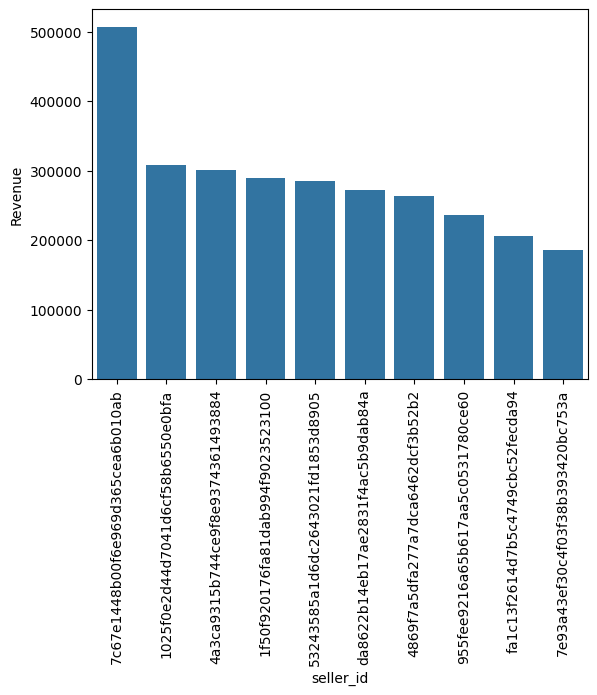

In [54]:
sns.barplot(x = "seller_id" , y = "Revenue" , data = df)
plt.xticks(rotation = 90)
plt.show()

# Advance Question

# Calculate the moving average of order values for each customer over their order history.

In [70]:
query = """select customer_id , order_purchase_timestamp ,payment ,  avg(payment) over(partition by customer_id 
order by order_purchase_timestamp rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id ,orders.order_purchase_timestamp, payments.payment_value  as payment from payments
join orders on payments.order_id =  orders.order_id ) as a """ 
cur.execute(query)
data = cur.fetchall()


In [72]:
df = pd.DataFrame(data , columns = ["CID" , "OPTS" , "payment" , "Mov_avg"] ) 

In [75]:
df.tail(10)

,CID,OPTS,payment,Mov_avg
207762,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,9.49,50.650002
207763,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,0.64,27.120001
207764,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
207765,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
207766,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
207767,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
207768,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000
207769,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000
207770,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
207771,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


# calculate the cumulative sales per month for each year

In [77]:
query = """ 
select yrs , mnths ,payment,  sum(payment) over(order by yrs , mnths ) from 
(select year(orders.order_purchase_timestamp) as yrs  , 
month(orders.order_purchase_timestamp) as mnths ,  
round(sum(payments.payment_value),2) as payment
from orders join  payments
on orders.order_id = payments.order_id 
group by yrs , mnths
order by yrs  , mnths) as a """ 
cur.execute(query)
data = cur.fetchall()


In [82]:
df = pd.DataFrame(data , columns = ["Yrs" , "Mnths" , "payment" , "Cumulative Payment" ] )
df.head(10)

,Yrs,Mnths,payment,Cumulative Payment
0,2016,9,504.48,504.48
1,2016,10,118180.96,118685.44
2,2016,12,39.24,118724.68
3,2017,1,276976.08,395700.76
4,2017,2,583816.02,979516.78
5,2017,3,899727.20,1879243.98
6,2017,4,835576.06,2714820.04
7,2017,5,1185837.64,3900657.68
8,2017,6,1022552.76,4923210.44
9,2017,7,1184765.84,6107976.28


# calculate the year over year growth rate of total sales

In [97]:
query = """ with a as (select year(orders.order_purchase_timestamp) as yrs  , 
round(sum(payments.payment_value),2) as payment
from orders join  payments
on orders.order_id = payments.order_id 
group by yrs 
order by yrs  )
select yrs , payment , ((payment - lag(payment ,1  ) over (order by yrs))/lag(payment, 1) 
over(order by yrs))*100 from a 
""" 
cur.execute(query)
data = cur.fetchall()
data

[(2016, 118724.68, None),
 (2017, 14499493.46, 12112.703761340945),
 (2018, 17399526.1, 20.00092381158259)]

In [98]:
df = pd.DataFrame(data , columns = ["yrs" , "sales" , "Previous year"])
df.head(11)

,yrs,sales,Previous year
0,2016,118724.68,NaN
1,2017,14499493.46,12112.703761
2,2018,17399526.10,20.000924


# calculate the retention rate of customer , defined as the percentage of customer who make another purchase of customer who make another purchase within 6 months of their first purchase.

In [100]:
query = """with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id) 

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id ;"""

cur.execute(query)
data = cur.fetchall()

data

[(None,)]

# Identify the top 3 customers who spent the most money in each year.

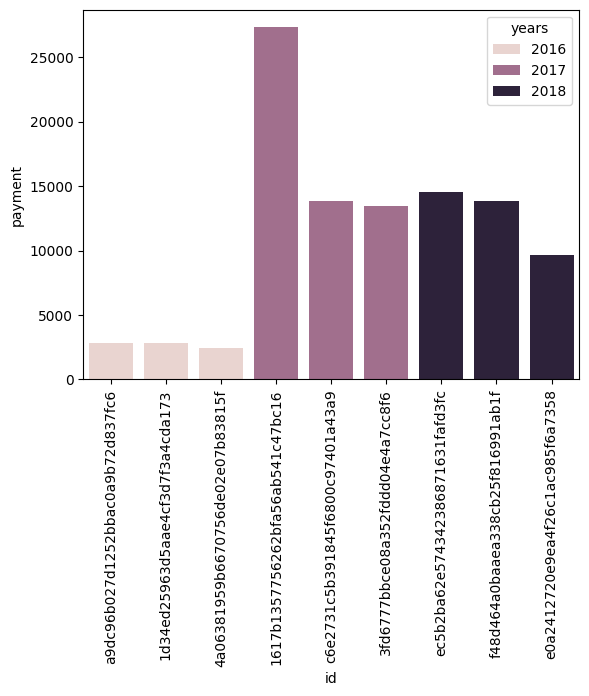

In [101]:
query = """select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3 ;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years","id","payment","rank"])
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show()